In [1]:
import os, sys
sys.path.append(os.getcwd() + "/../src")
from pickle_workaround import pickle_load
from TfidfVectorizer import TfidfVectorizer
from vectorizer import tokenize, extract_requirements
from nlp import get_top_10_docs
from data import get_query_corpus, get_connection
from summaries import summarize_doc, summarize_doc_nmf

import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from IPython.display import Image, display

In [2]:
_ = get_connection("/home/mark/Documents/missionmark/missionmark_db_creds")

query = """
           SELECT opportunity_id, program_description
           FROM import.govwin_opportunity
           WHERE program_description ILIKE('%REQUIREMENTS%');
        """
doc_ids, corpus_full = get_query_corpus(query, True)
# corpus = np.array([extract_requirements(doc) for doc in corpus_full])
corpus = corpus_full

Connecting to Postgres database...
 -> Connection successful!
Loading corpus...
 -> 8851 documents loaded!


In [4]:
tfidf = TfidfVectorizer(pickle_load("../output/CountVectorizer.pkl"), pickle_load("../output/TfidfTransformer.pkl"))
tfidf_corpus = pickle_load("../output/tfidf_corpus.pkl")
# tfidf_corpus = tfidf.transform(corpus)
vocabulary = tfidf.get_feature_names()

Loading ../output/CountVectorizer.pkl from cache...
 -> ../output/CountVectorizer.pkl loaded!
Loading ../output/TfidfTransformer.pkl from cache...
 -> ../output/TfidfTransformer.pkl loaded!
Loading ../output/tfidf_corpus.pkl from cache...
 -> ../output/tfidf_corpus.pkl loaded!


In [5]:
nmf = pickle_load("../output/NMF.pkl")
H = nmf.components_
W = nmf.transform(tfidf_corpus)
W_max = W.max(axis = 0)
W_normalized = W / W_max

Loading ../output/NMF.pkl from cache...
 -> ../output/NMF.pkl loaded!


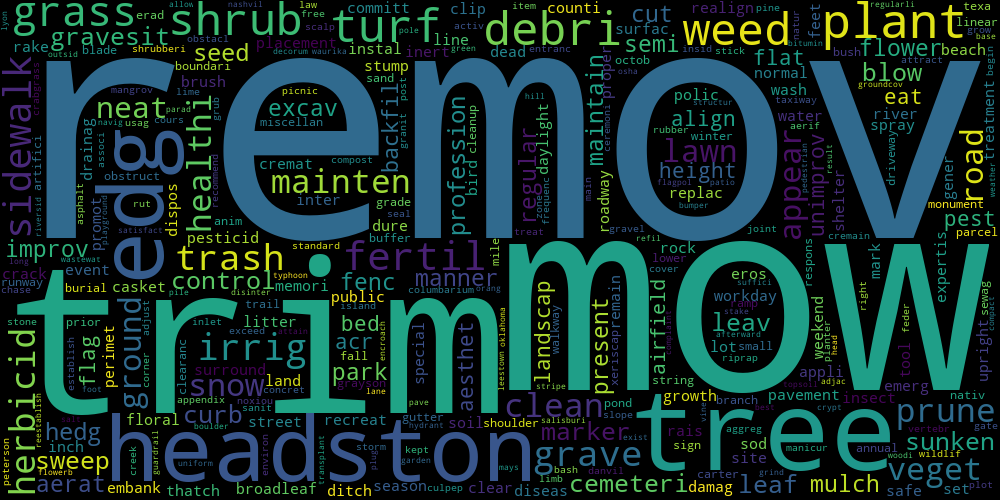

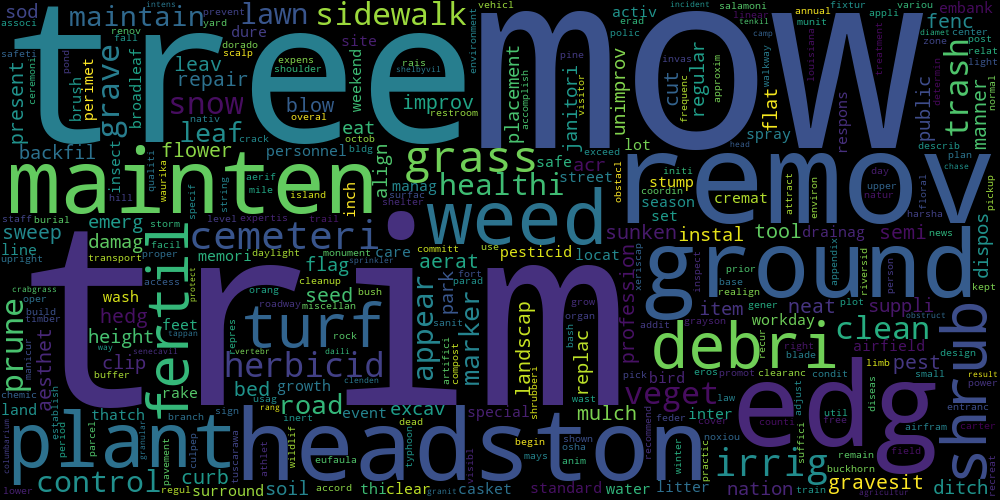

*************************************************************
148564 -> STRENGTH: 1.0 (0.1502)
The Department of Veterans Affairs, National Cemetery Administration may have a continuing requirement for Grounds Maintenance Services for Tallahassee National Cemetery

PREVIOUS REQUIREMENTS
The contractor shall provide all personnel, equipment, tools, supplies, supervision, and other items and services necessary to ensure that total cemetery maintenance is performed at Tallahassee VA National Cemetery in a manner that will maintain healthy grass, trees, shrubs, and plants and present a clean, neat, and professional appearance throughout

Services include, but are not limited to maintenance of grounds, regular mowing, trimming, edging, removal of leaves and debris, as well as, sweeping or blowing off roads and sidewalks, maintenance of gravesites and headstones, and the alignment and washing of headstones, headstone installation and maintenance, turf maintenance, plant and tree maintenance,

The Department of Veterans Affairs, National Cemetery Administration may have a continuing requirement for grounds maintenance at Port Hudson National Cemetery located at 20978 Port Hickey Road, Zachary, LA 70791

PREVIOUS REQUIREMENTS:
Contractor is responsible for the following:
1

Providing all grounds maintenance services including, but not limited to: Maintenance of grounds, regular mowing, weed eating, removal of leaves and debris, as well as, sweeping or blowing off roads and sidewalks, irrigation, facility maintenance and trash removal
2

Turf Maintenance: Proper fertilizing, weeding, sodding and seeding of turf
3

Turf surrounding a headstone or marker is trimmed and stick edging to its recommended height
4

Plant and Tree Maintenance
5

Maintenance of gravesites and headstones
6

Headstone cleaning and maintenance
7

Headstone Setting and Alignment
8

Sunken grave repair
9

Grave excavation and backfilling
10

Snow and ice removal
11

Placement and removal of flags
12

Provid

In [18]:
topic_i = 11

display(Image(filename=f"../static/wordclouds/{topic_i}_nmf_wordcloud.png"))
display(Image(filename=f"../static/wordclouds/{topic_i}_tfidf_wordcloud.png"))

for doc, strength in get_top_10_docs(W_normalized, topic_i):
    print("*************************************************************")
    print(doc_ids[doc], "-> STRENGTH:", round(strength, 2), f"({round(W[doc, topic_i], 4)})")
    print(summarize_doc_nmf(corpus[doc], tfidf, nmf, topic_i, n_sentences=100))
    #print(summarize_doc(doc))
    print()

In [ ]:
# topic_strengths = W.max(axis=0) / W.max()
# _ = plt.hist(topic_strengths, bins=20)
# for i, strength in enumerate(W.max(axis=0) / W.max()):
#     print(str(i).rjust(2, "0"), "->", str(round(strength, 2)).ljust(4, "0"))